**Antes que nada correr esta celda para poder usar julia**

In [ ]:
# Installation cell
%%capture
%%shell
if ! command -v julia 3>&1 > /dev/null
then
    wget -q 'https://julialang-s3.julialang.org/bin/linux/x64/1.6/julia-1.6.1-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
fi
julia -e 'using Pkg; pkg"add IJulia; precompile;"'
echo 'Done'

Despues de ejecutar la celda de arriba, Vamos a la barra de opciones de google colab y tocamos en **Editar** y despues en **Configuración del cuaderno** que está abajo de todo casi. Seleccionamos *Julia 1.6* en Tipo de Entorno de Ejecución. Y si queremos cambiamos el acelerador por hardware (default en GPU, les recomiendo que lo saquen). 

<br/>Editar y configuración

> ![Colab Img](https://i.imgur.com/7XLVAMN.png)

<br/>Esta es la configuración que deberian tener:

> ![Colab Img](https://i.imgur.com/UasidBO.png)

<br/>No se olviden de guardar.
<br/>**Arrancamos nomas, recuerden que siempre que se reinicie el entorno o lo que sea ejecuten esto**.






In [ ]:
VERSION #Para ver la version de julia

v"1.6.1"


## Links:
### https://introajulia.org/ -> Bastante completo el link
### https://es.xcv.wiki/wiki/Multiple_dispatch -> Multiple_Dispatch pa los pi
### https://julialang.org/blog/2012/02/why-we-created-julia/ -> Por qué se creo Julia (ingles)
### https://docs.julialang.org/en/v1/ -> Documentación Julia (Ingles)
### https://julialang.org/benchmarks/ -> Comparaciones con Julia y otros lenguajes
### https://es.wikipedia.org/wiki/Julia_(lenguaje_de_programaci%C3%B3n) -> La vieja confiable
### https://en.wikipedia.org/wiki/List_of_algorithms -> Lista de algoritmos 
### https://github.com/jltabara/Julia-y-las-Matematicas/blob/master/Julia01.md -> Matemática básica

#Matemática
### https://github.com/jltabara/Julia-y-las-Matematicas/blob/master/Julia01.md -> Matemática básica
### https://joseluistabaracarbajo.gitbooks.io/julia-y-las-matematicas/content/Julia03.html -> Matrices, vectores y eso
### https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/ -> Matrices más a fondo, tipos, etc
### https://julia-cn.readthedocs.io/es/latest/manual/arrays.html -> Vectores
### http://web.mit.edu/julia_v0.6.2/julia/share/doc/julia/html/en/stdlib/linalg.html -> linear algebra biblioteca
### https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/

#Prueba de código


###Problemas encontrados para DVS:
- U es dificil de sacar sin dejar algo muy sucio ya que cada u_i se divide por un valor singular que puede ser 0.
- https://github.com/JuliaLang/julia/issues/6965 debate por el mal funcionamiento de eigs
- Autovalores que deberian ser 0 son numeros negativos.

http://web.mit.edu/julia_v0.6.2/julia/share/doc/julia/html/en/stdlib/linalg.html 

Linear Algebra con sus funciones ya implementadas para poder utilizar (ya está implementada la dvs o svd como le quieras decir bbto)


In [ ]:
A = [50 0 40 ; 0 0 0 ; 40 0 50]
A = [10 0 50 25 4 10 70; 0 3 20 15 6 11 5; 0 0 7 3 10 20 1; 0 0 0 6 9 30 8; 0 0 0 0 2 15 11; 0 0 0 0 0 10 20; 0 0 0 0 0 0 10]

avas = eigvals(A)
aves = eigvecs(A)

show(stdout, "text/plain", A)
println("")
println("")
show(stdout, "text/plain", avas)
println("")
println("")
show(stdout, "text/plain", aves)
println("")
println("")

B = aves * diagm(avas) * inv(aves) 
show(stdout, "text/plain", B)
println("")
println("")
println(eigvals(B))


7×7 Matrix{Int64}:
 10  0  50  25   4  10  70
  0  3  20  15   6  11   5
  0  0   7   3  10  20   1
  0  0   0   6   9  30   8
  0  0   0   0   2  15  11
  0  0   0   0   0  10  20
  0  0   0   0   0   0  10

7-element Vector{Float64}:
  2.0
  3.0
  6.0
  7.0
 10.0
 10.0
 10.0

7×7 Matrix{Float64}:
  0.251147   0.0   0.897795   -0.956248   1.0  -1.0           1.0
  0.966064   1.0  -0.430942    0.286875   0.0   1.42071e-16  -1.42071e-16
 -0.0154096  0.0  -0.0861883   0.0573749  0.0   3.54689e-17  -3.54689e-17
 -0.053341   0.0   0.0287294   0.0        0.0   1.68721e-17  -1.68721e-17
  0.0237071  0.0   0.0         0.0        0.0   2.69954e-18  -2.69954e-18
  0.0        0.0   0.0         0.0        0.0   1.43975e-18  -1.43975e-18
  0.0        0.0   0.0         0.0        0.0   0.0           1.59845e-34

7×7 Matrix{Float64}:
 10.0           1.74707e-17  50.0          25.0           4.0  -5888.0       6.91753e18
  2.71575e-15   3.0          20.0          15.0           6.0   1087.88    244.5

#Descomposición en valores singulares

Si $F::SVD$ ($F$ es de tipo $SVD$)se puede obtener $U$, $S$ y $V$ de la siguiente manera:

$U = F\cdot U$

$S=F\cdot S $ (está ordenado de forma descendente)

$V = F\cdot V$ ó para devolver la transpuesta $F\cdot Vt$

Para ver si la svd se realizo correctamente se puede realizar la siguiente operación:

$$A =U\cdot Diagonal(S)\cdot Vt$$

In [ ]:
using LinearAlgebra

In [ ]:
#Creo la matrix
A = [1. 0. 0. 0. 2.; 0. 0. 3. 0. 0.; 0. 0. 0. 0. 0.; 0. 2. 0. 0. 0.]

4×5 Matrix{Float64}:
 1.0  0.0  0.0  0.0  2.0
 0.0  0.0  3.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  2.0  0.0  0.0  0.0

In [ ]:
#Hago la svd de A que va a ser almacenada en F
F = svd(A)

SVD{Float64, Float64, Matrix{Float64}}
U factor:
4×4 Matrix{Float64}:
 0.0  1.0  0.0   0.0
 1.0  0.0  0.0   0.0
 0.0  0.0  0.0  -1.0
 0.0  0.0  1.0   0.0
singular values:
4-element Vector{Float64}:
 3.0
 2.23606797749979
 2.0
 0.0
Vt factor:
4×5 Matrix{Float64}:
 -0.0       0.0  1.0  -0.0  0.0
  0.447214  0.0  0.0   0.0  0.894427
 -0.0       1.0  0.0  -0.0  0.0
  0.0       0.0  0.0   1.0  0.0

In [ ]:
#Multiplico las descomposiciones para ver si realmente me devuelve la matriz
F.U * Diagonal(F.S) * F.Vt
#Diagonal(matriz) me devuelve la diagonal de la diagonal

4×5 Matrix{Float64}:
 1.0  0.0  0.0  0.0  2.0
 0.0  0.0  3.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  2.0  0.0  0.0  0.0

In [ ]:
#Creo variables en las cuales guardo u, sigma y v transpuesta
u, s, v = F;

In [ ]:
u

4×4 Matrix{Float64}:
 0.0  1.0  0.0   0.0
 1.0  0.0  0.0   0.0
 0.0  0.0  0.0  -1.0
 0.0  0.0  1.0   0.0

In [ ]:
s

4-element Vector{Float64}:
 3.0
 2.23606797749979
 2.0
 0.0

In [ ]:
v

5×4 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.0  0.447214  -0.0  0.0
  0.0  0.0        1.0  0.0
  1.0  0.0        0.0  0.0
 -0.0  0.0       -0.0  1.0
  0.0  0.894427   0.0  0.0

In [ ]:
#Chequeo si la
u == F.U && s == F.S && v == F.V

true

Esto nos permite hacer cosas como:
$$A=U\Sigma V^T$$

Multiplicando a ambos lados por V:
$$AV=U\Sigma V^TV=U\Sigma I=U\Sigma$$

$\rightarrow$ Si $A$ contiene algún tipo de datos, se dice que las columnas de $V$ son los $\textbf{componentes principales}$ de estos, más sobre esto próximamente.

**Para que usar SVD**

- Compresión de imagenes:

Si consideramos a la imagen como una matrix de píxeles, podemos aplicarle la svd y quedarnos con los r valores singulares más grandes (aproximaciónn de rango r), mientras mas chico r mayor sera la compresión.

![Pixeles](https://www.tutorialexample.com/wp-content/uploads/2019/11/svd-tutorials-and-examples.png)

Tener en cuenta que estamos descartando info importante para la imagen

![Compresión de imágenes](https://i.imgur.com/CkYfaM1.png)Lo que se puede hacer con compresión de imagenes

http://timbaumann.info/svd-image-compression-demo/

**Otras aplicaciones:**

- Reducción de dimensiones de un dataset
- Information retrieval, Analisis Semantico Latente(LSA)
- Sistemas de recomendación
- Procesamiento de señales
- Motores de busqueda (ver CubeSVD p.ej)


**Lecturas recomendadas**

- Lectura de G. Strang:
  https://www.youtube.com/watch?v=mBcLRGuAFUk  

- Algo de intuición sobre lo que hace la SVD:
  https://gregorygundersen.com/blog/2018/12/10/svd/ 

- Explicación con algo de código:
  https://ethen8181.github.io/machine-learning/dim_reduct/svd.html 



#Fibonacci Recursivo



## Teoría

**Recuerdo**

La secuencia se genera suamndo dos numeros consecutivos para obtener el siguiente.

La sucesión comienza en el 1 y para saber el siguiente numero de la sucesión  se le suma el anterior: 

1 + 0 = 1

Y asi con todos los numeros. Es importante recordar que ya hay definiciones preestablecidas, a continuación hago referencia a ellas:

##Definición recurrente

Los numeros de Fibonacci quedan definidos por las ecuaciones
$$f_0=0$$
$$f_1=1$$
$$f_n=f_{n-1}+f_{n-2}$$

Esto produce los siguientes numeros:
* $f_2=1$
* $f_3=2$
* $f_4=3$
* $f_5=5$
* $f_6=8$
* $f_7=13$
* $f_8=21$

Y así sucesivamente.

Esta manera de definir, de hecho considerada algoritmica, es usual en matemática discreta.

Es importante definir $f_0=0$ para que se pueda cumplir la importante propiedad de que: $f_n$ divide a $f_{m+n}$ para cualquier $m,n>=1$.

##Implementación en Julia

In [ ]:
#Defino Fibonacci
function Fibonacci(numero)
           if numero < 2
               return numero
           else
               return Fibonacci(numero-1)+Fibonacci(numero-2)
           end
       end

Fibonacci (generic function with 1 method)

In [ ]:
#Pruebo si funciona correctamente
Fibonacci(8)

21

Observo que al ingresar un valor muy elevado la ejecución tarda demasiado tiempo, esto se debe a que Julia no tiene llamados a optimización como si lo tiene el compilador de C.

#Serie de Fourier


https://www.youtube.com/watch?v=dZrShAGqT44&ab_channel=SteveBrunton

https://www.youtube.com/watch?v=r6sGWTCMz2k

https://es.wikipedia.org/wiki/Serie_de_Fourier

http://databookuw.com/databook.pdf

https://wikunia.github.io/Javis.jl/dev/tutorials/tutorial_1/

In [ ]:
#=
import Pkg
Pkg.add("CSV")
using CSV
using Pkg
Pkg.add("DataFrames")
Pkg.add("Plots")
using DataFrames
using Plots
Pkg.add("Javis")
using Javis
Pkg.add("Colors")
using Colors
 =#

##Explicación

#Introducción a la Serie de Fourier
Existen muchas maneras de representar la serie (una de ellas con complejos) pero no vamos a mostrar todas, para dar una introducción básica nos vamos a centrar en una:
$$P(t)=\frac{a_0}{2}+\sum_{n=1}^\infty\left[a_n\ cos\left(2\pi n\frac{1}{T}t\right)+b_n\ sen\left(2\pi n\frac{1}{T}t\right)\right]$$

Para empezar hay que saber que:
* Existen condiciones de convergencia de la Serie de Fourier a $P(t)$
* El periodo ($T$) es el tiempo en el que se tarda en completar un ciclo
* La frecuencia es la cantidad de ciclos que se cumplen en un determinado tiempo

###Condiciones de convergencia
La serie converge a $P(t)$ si $P(t)$ es:
* Función periódica
* Continua a trozos
* Acotada
* En un periodo cualquiera debe tener un número finito de máximos y mínimos locales y un número finito de discontinuidades.

Para comenzar tenemos que entender que en los argumentos de coseno y seno de la serie se encuentra explícita la frecuencia fundamental de la función que queremos representar ($\frac{1}{T}$), pero, al estar la frecuencia acompañada de una $n$ lo que se tiene en realidad es un multiplo de la frecuencia fundamental.

Algo útil de saber es que los coeficientes $a_n$ y $b_n$ nos dicen nos dicen "que tanto se parecen" las funciones seno o coseno (dependiendo de a quien acompañen) con la original. Por ejemplo, si $a_0$ es 0 y $b_0$ es 1 con n $\in [0,1]$ quiere decir que la función original se parece mucho a $sen(2\pi \frac{1}{T}t)$.

Lo que Fourier quizo mostrar es que sumando una cantidad determinada de senos y cosenos, de amplitudes y frecuencias determinadas que son multiplo de la fundamental, se puede representar cualquier función.

![imagen](https://ocw.aprende.org/courses/mathematics/18-103-fourier-analysis-fall-2013/18-103-f13.jpg)

Lo que se ve en la imagen es la suma de funciones seno y coseno de diferentes frecuencias pero mismas amplitudes. De esta manera se puede sumar muchas funciones hasta que la funcion termina siendo prácticamente igual a la buscada.

No vamos a entrar más a fondo porque no es la idea. Vamos a mostrar como se puede emplear esto en la práctica con Julia y lo sencillo que es.

##**Valor absoluto**

###Aproximación de la función valor absoluto con series de Fourier
$f(x)= |x|\ $, en el intervalo $[-\pi , \pi]$

$|x| \approx \frac{\pi}{2}-\frac{4}{\pi} \sum_{n=1}^\infty \frac{cos(2n-1)}{(2n-1)^2}\quad$ en el intervalo: $\quad[-\pi , \pi]$

In [ ]:
import Pkg
using Pkg
Pkg.add("Plots")
using Plots

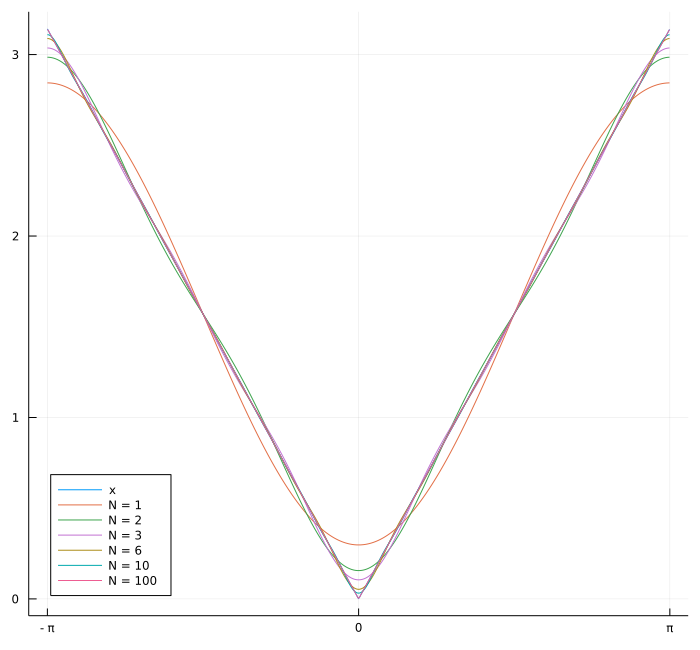

In [ ]:
function f(x, N)
  sum = 0.0
  for n = 1:N
    sum = sum + cos((2*n-1)*x)/(2*n-1)^2
  end
  return π/2 - (4/π)*sum
end

x= -π:0.01:π


plot(x, abs.(x), xticks = ([-π:π:π;], ["-\\pi","0","\\pi"]), label="x", legend=:bottomleft);
plot!(x, f.(x,1), xticks = ([-π:π:π;], ["-\\pi","0","\\pi"]), label="N = 1");
plot!(x, f.(x,2), xticks = ([-π:π:π;], ["-\\pi","0","\\pi"]), label="N = 2");
plot!(x, f.(x,3), xticks = ([-π:π:π;], ["-\\pi","0","\\pi"]), label="N = 3");
plot!(x, f.(x,6), xticks = ([-π:π:π;], ["-\\pi","0","\\pi"]), label="N = 6");
plot!(x, f.(x,10), xticks = ([-π:π:π;], ["-\\pi","0","\\pi"]), label="N = 10");
plot_general_1 =plot!(x, f.(x,100), xticks = ([-π:π:π;], ["-\\pi","0","\\pi"]), label="N = 100");
gr(size = (700, 650))
display(plot_general_1)

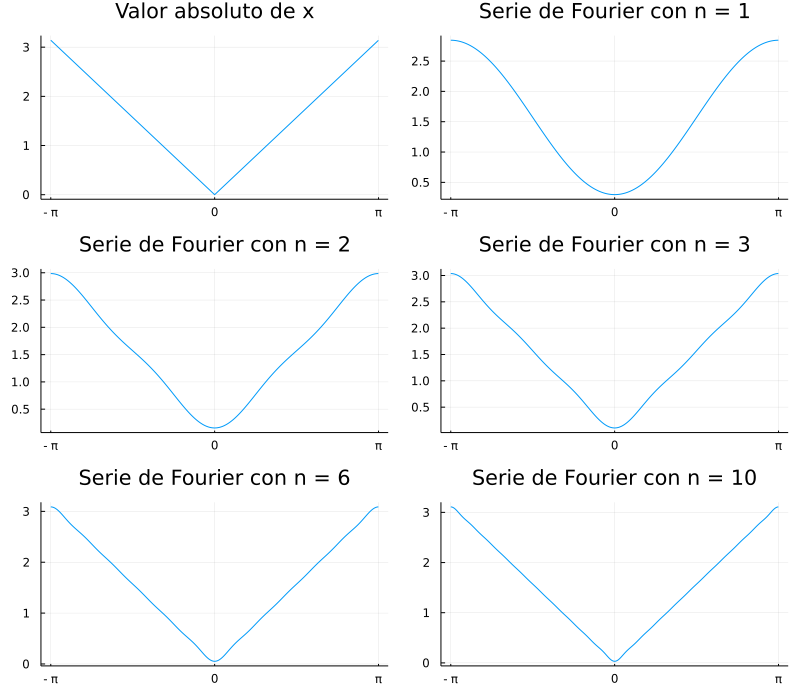

In [ ]:
gr(size = (800, 700))
plot_1 = plot(x, abs.(x), xticks = ([-π:π:π;], ["-\\pi","0","\\pi"]), label="x", legend=:bottomleft, title = "Valor absoluto de x");
plot_2 = plot(x, f.(x,1), xticks = ([-π:π:π;], ["-\\pi","0","\\pi"]), label="N = 2", title = "Serie de Fourier con n = 1");
plot_3 = plot(x, f.(x,2), xticks = ([-π:π:π;], ["-\\pi","0","\\pi"]), label="N = 6", title = "Serie de Fourier con n = 2");
plot_4 = plot(x, f.(x,3), xticks = ([-π:π:π;], ["-\\pi","0","\\pi"]), label="N = 25", title = "Serie de Fourier con n = 3");
plot_5 = plot(x, f.(x,6), xticks = ([-π:π:π;], ["-\\pi","0","\\pi"]), label="N = 100", title = "Serie de Fourier con n = 6");
plot_6 = plot(x, f.(x,10), xticks = ([-π:π:π;], ["-\\pi","0","\\pi"]), label="N = 250", title = "Serie de Fourier con n = 10");
plot(plot_1, plot_2, plot_3, plot_4, plot_5, plot_6, layout = (3, 2), legend = false)

## **Función en un intervalo**


###Aproximación de una recta en un intervalo con series de Fourier

$f(x) = x$ , en el intervalo $[-\pi , \pi]$

$x \approx 2 \sum_{n=1}^\infty \frac{(-1)^{n+1}}{n}sen(nx)$


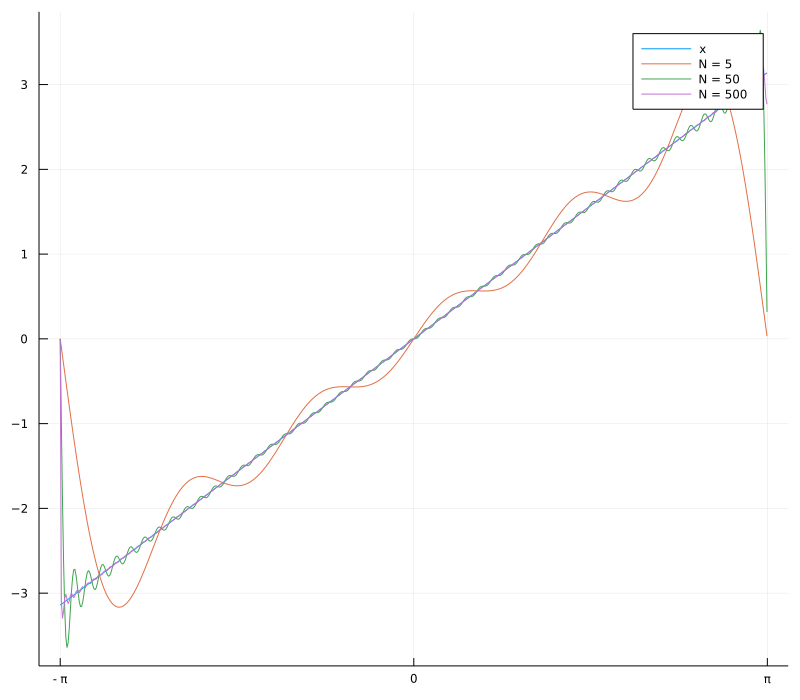

In [ ]:
function f(x, N)
  sum = 0.0
  for n = 1:N
    sum = sum + ((-1)^(n+1)/n) * sin(n * x)
  end
  return 2 * sum
end

x= -π:0.01:π

plot(x, x, xticks = ([-π:π:π;], ["-\\pi","0","\\pi"]), label = "x");
plot!(x, f.(x,5), xticks = ([-π:π:π;], ["-\\pi","0","\\pi"]), label = "N = 5");
plot!(x, f.(x,50), xticks = ([-π:π:π;], ["-\\pi","0","\\pi"]), label = "N = 50");
plot_general_2 = plot!(x, f.(x,500), xticks = ([-π:π:π;], ["-\\pi","0","\\pi"]), label = "N = 500");
gr(size = (700, 650))
display(plot_general_2)

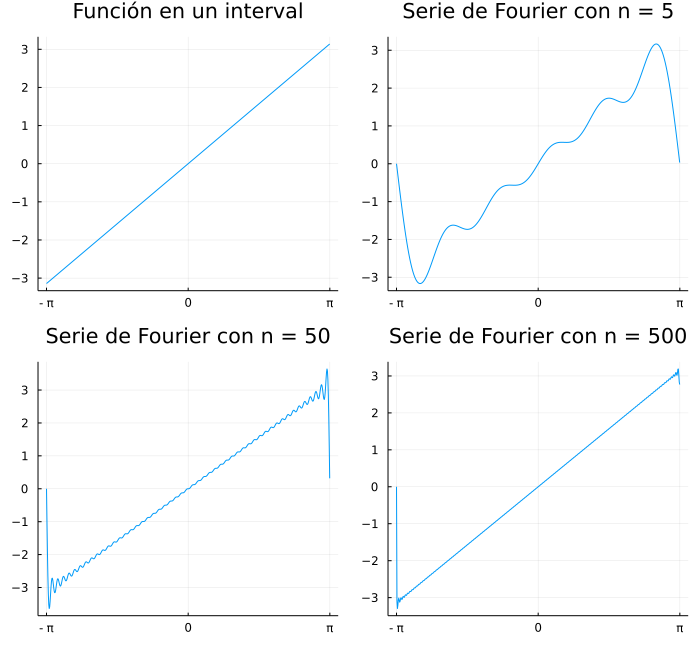

In [ ]:
plot_1_1 = plot(x, x, xticks = ([-π:π:π;], ["-\\pi","0","\\pi"]), title = "Función en un intervalo");
plot_2_2 = plot(x, f.(x,5), xticks = ([-π:π:π;], ["-\\pi","0","\\pi"]), title = "Serie de Fourier con n = 5");
plot_3_3 = plot(x, f.(x,50), xticks = ([-π:π:π;], ["-\\pi","0","\\pi"]), title = "Serie de Fourier con n = 50");
plot_4_4 = plot(x, f.(x,500), xticks = ([-π:π:π;], ["-\\pi","0","\\pi"]), title = "Serie de Fourier con n = 500");

gr(size = (700, 650))
plot(plot_1_1, plot_2_2, plot_3_3, plot_4_4, layout = (2,2), legend = false)